# Plots

This notebook was used to reproduce the figures 2B for permuted and rotated MNIST.

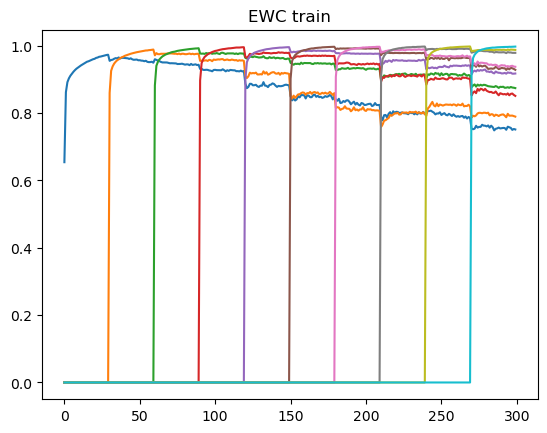

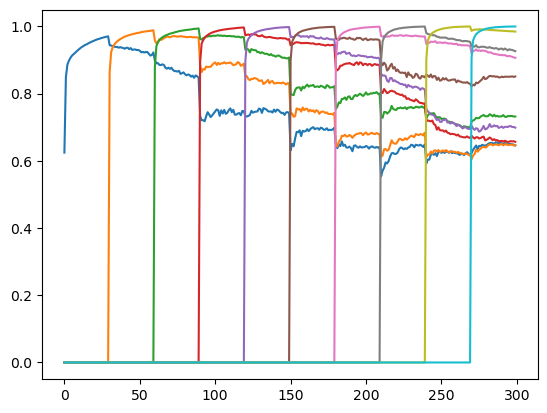

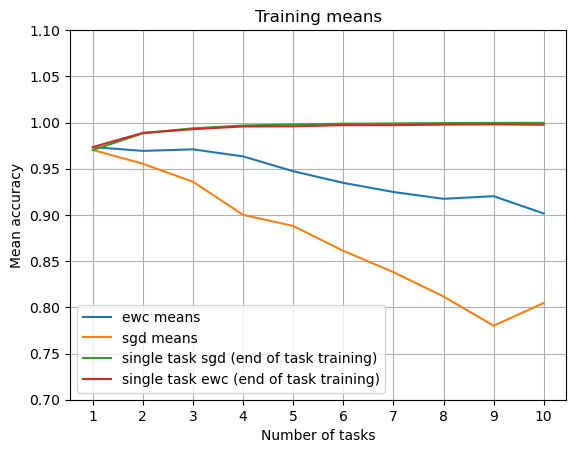

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# load metrics
ewc = np.load('results/metrics_ewc_10perm.npz')
sgd = np.load('results/metrics_sgd_10perm.npz')

plt.figure()
plt.title("EWC train")
for i in range(10):
    plt.plot(ewc['train_accuracies'][i], label='train_loss')

plt.figure("SGD train")
for i in range(10):
    plt.plot(sgd['train_accuracies'][i], label='test_loss')

def get_means(array, epochs=30, offset=0):
    means = []
    for i in range(10):
        # take the mean of first i+1 curves at i*30 th epoch
        mean = 0
        for j in range(i+1):
            mean += array[j][(i+1)*epochs-1-offset]
        means.append(mean/(i+1))
    return means

def get_single_task_finals(array, epochs=30, offset=0):
    final = []
    for i in range(10):
        final.append(array[i][(i+1)*epochs-1-offset])
    return final

ewc_means_valid = get_means(ewc['train_accuracies'], 30)
sgd_means_valid = get_means(sgd['train_accuracies'], 30)

single_task_sgd = get_single_task_finals(sgd['train_accuracies'], 30)
single_task_ewc = get_single_task_finals(ewc['train_accuracies'], 30)

xaxis = np.arange(1, 11, 1)

plt.figure()
plt.title("Training means")
plt.plot(xaxis, ewc_means_valid, label='ewc means')
plt.plot(xaxis, sgd_means_valid, label='sgd means')
plt.plot(xaxis, single_task_sgd, label='single task sgd (end of task training)')
plt.plot(xaxis, single_task_ewc, label='single task ewc (end of task training)')
plt.xlabel("Number of tasks")
plt.ylabel("Mean accuracy")
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0.7, 1.1)
plt.grid()
plt.legend(loc="lower left")
plt.show()

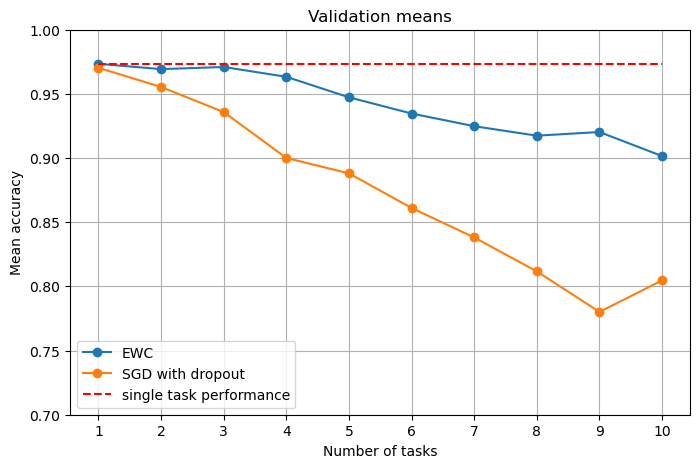

In [6]:
plt.figure(figsize=(8, 5))
plt.title("Validation means")
# plot with dots for data points
plt.plot(xaxis, ewc_means_valid, 'o-', label='EWC')
plt.plot(xaxis, sgd_means_valid, 'o-', label='SGD with dropout')
plt.hlines(single_task_ewc[0], 1, 10, colors='r', linestyles='dashed', label='single task performance')
plt.xlabel("Number of tasks")
plt.ylabel("Mean accuracy")
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0.7, 1)
plt.grid()
plt.legend(loc="lower left")

# export figure as png
# plt.savefig('2B_perm.png')

plt.show()

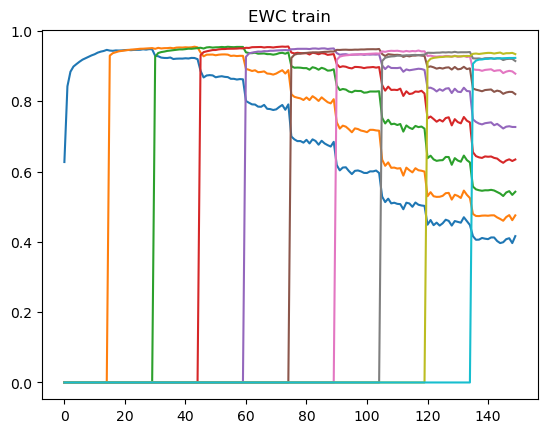

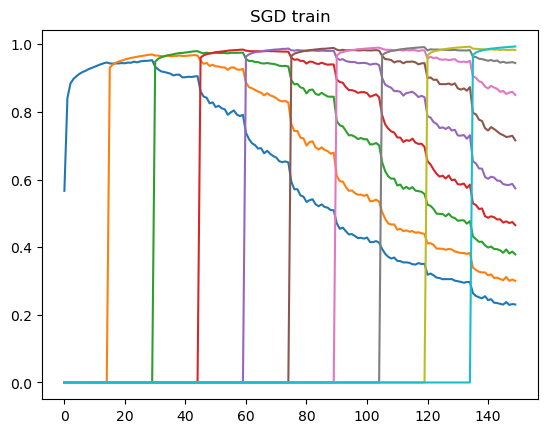

In [7]:
# load metrics
ewc = np.load('results/metrics_ewc_10rot.npz')
sgd = np.load('results/metrics_sgd_10rot.npz')

plt.figure()
plt.title("EWC train")
for i in range(10):
    plt.plot(ewc['train_accuracies'][i], label='train_loss')

plt.figure()
plt.title("SGD train")
for i in range(10):
    plt.plot(sgd['train_accuracies'][i], label='test_loss')

ewc_means_valid = get_means(ewc['train_accuracies'], 15)
sgd_means_valid = get_means(sgd['train_accuracies'], 15)

single_task_sgd = get_single_task_finals(sgd['train_accuracies'], 15)
single_task_ewc = get_single_task_finals(ewc['train_accuracies'], 15)

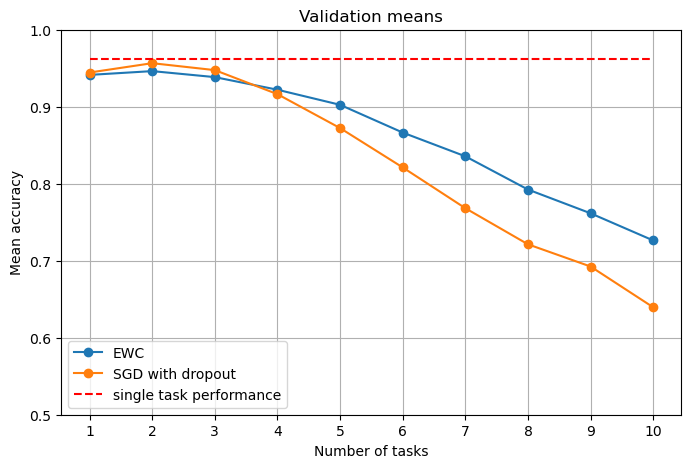

In [8]:
ewc_means_valid = get_means(ewc['val_accuracies'], 15)
sgd_means_valid = get_means(sgd['val_accuracies'], 15)

single_task_ewc = get_single_task_finals(ewc['val_accuracies'], 15)
single_task_sgd = get_single_task_finals(sgd['val_accuracies'], 15)

xaxis = np.arange(1, 11, 1)

plt.figure(figsize=(8, 5))
plt.title("Validation means")
# plot with dots for data points
plt.plot(xaxis, ewc_means_valid, 'o-', label='EWC')
plt.plot(xaxis, sgd_means_valid, 'o-', label='SGD with dropout')
# plt.plot(xaxis, single_task_sgd, 'o-', label='single task sgd (end of training)')
# plt.plot(xaxis, single_task_ewc, 'o-', label='single task ewc (end of training)')
plt.hlines(single_task_sgd[1], 1, 10, colors='r', linestyles='dashed', label='single task performance')
plt.xlabel("Number of tasks")
plt.ylabel("Mean accuracy")
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0.5, 1)
plt.grid()
plt.legend(loc="lower left")

# export figure as png
# plt.savefig('2B_rot.png')

plt.show()